# Part 1 Markov Chain
## Sec 1 Markov Chain Concepts
### Markov Property
A stochastic process satisfies the **Markov property** if:
$$
P(X_{t+1} = x \mid X_0, X_1, \ldots, X_t) = P(X_{t+1} = x \mid X_t).
$$

### Homogeneous Markov Chains
A Markov chain is **homogeneous** if:
$$
P(X_{t+1} = x \mid X_t) = P(X_{s+1} = x \mid X_s), \quad \text{for all } t, s \in \mathbb{N}.
$$

### Lemma 7.7
Let $\{X_n, n \in \mathbb{N}\}$ be a homogeneous Markov chain. Let the state space $X = \{s_1, \ldots, s_N\}$ be enumerated and let $\mu_0$ be the PMF of $X_0$. Then the PMF $\mu_n$ for $X_n$ is given by:
$$
\mu_n = \mu_0 P^n.
$$

### Communication Between States
Let $X_t$ be a homogeneous Markov chain on state space $X = \{s_1, \ldots, s_N\}$. We say that $s_i \to s_j$ (communicates) if there exists a $t \in \mathbb{N}$ such that:
$$
P(X_t = s_j \mid X_0 = s_i) > 0.
$$
We say that $s_i$ and $s_j$ **intercommunicate** if $s_i \to s_j$ and $s_j \to s_i$. This is denoted as:
$$
s_i \leftrightarrow s_j.
$$

### Irreducibility
A homogeneous Markov chain $\{X_t\}_{t \in \mathbb{Z}_+}$ on state space $X = \{s_1, s_2, \ldots, s_k\}$ is said to be **irreducible** if:
$$
s_i \leftrightarrow s_j \quad \text{for each } (s_i, s_j) \in X^2.
$$
Otherwise, the chain is said to be **reducible**.

### Definition 7.21 (Return Times and Period)
Let:
$$
T(x) := \{t \in \mathbb{N} : P^t(x, x) > 0\}
$$
be the set of possible return times to the starting state $x$. The **period** of state $x$ is defined as:
$$
\text{gcd}(T(x)),
$$
the greatest common divisor of $T(x)$. If $\text{gcd}(T(x)) = 1$, the state $x$ is said to be **aperiodic**.

### Definition 7.24 (Stationary Distribution)
Let $\{X_t\}_{t \in \mathbb{Z}_+}$ be a Markov chain with state space $X = \{s_1, s_2, \ldots, s_k\}$ and transition matrix $P = (P(x, y))_{(x, y) \in X^2}$. A row vector:
$$
\pi = (\pi(s_1), \pi(s_2), \ldots, \pi(s_k)) \in \mathbb{R}^{1 \times k}
$$
is said to be a **stationary distribution** for the Markov chain if it satisfies the following conditions:
1. **Probability distribution**:
$$
\pi(x) \geq 0 \quad \text{for each } x \in X \quad \text{and} \quad \sum_{x \in X} \pi(x) = 1.
$$
2. **Fixed point**:
$$
\pi P = \pi, \quad \text{i.e.,} \quad \sum_{x \in X} \pi(x) P(x, y) = \pi(y), \quad \text{for each } y \in X.
$$

### Definition 7.26 (Reversible)
A probability distribution $\pi$ on $X = \{s_1, s_2, \ldots, s_k\}$ is said to be a **reversible distribution** for a Markov chain $\{X_t\}_{t \in \mathbb{Z}}$ on $X$ with transition matrix $P$ if for every pair of states $(x, y) \in X^2$:
$$
\pi(x) P(x, y) = \pi(y) P(y, x).
$$


## Sec 2 自动化方法

In [3]:
import numpy as np
import networkx as nx
from functools import reduce
from math import gcd

# 在这里输入或者修改你的转移矩阵
P = np.array([[0.5, 0.5, 0.0],
              [0.2, 0.3, 0.5],
              [0.0, 1.0, 0.0]])

# 验证转移矩阵的合法性
def is_valid_transition_matrix(P):
    # 1. 检查是否为方阵
    if P.shape[0] != P.shape[1]:
        return False, "The matrix is not square."

    # 2. 检查是否所有元素为非负数
    if not np.all(P >= 0):
        return False, "The matrix contains negative elements."

    # 3. 检查每行是否归一化为 1
    if not np.allclose(np.sum(P, axis=1), 1):
        return False, "The rows do not sum to 1."

    return True, "The matrix is a valid transition matrix."

# 验证转移矩阵
is_valid, message = is_valid_transition_matrix(P)

# 输出验证结果
print("Markov chain and Digraph have been successfully constructed.")
print("The size of transition matrix P is:", P.shape)
print("Whether it is a qualified transition matrix:", message)

# 如果转移矩阵有效，构建有向图
if is_valid:
    # 1. 构建有向图
    G = nx.DiGraph()
    
    # 添加边和权重
    for i in range(P.shape[0]):
        for j in range(P.shape[1]):
            if P[i, j] > 0:  # 仅添加非零权重的边
                G.add_edge(i, j, weight=P[i, j])
    
    # 打印构建结果
    print("The directed graph (Digraph) has been successfully constructed.")
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())

    # 可视化或分析
    print("Graph edges with weights:")
    for u, v, data in G.edges(data=True):
        print(f"Edge from {u} to {v}, weight = {data['weight']}")
else:
    print("The transition matrix is not valid. Please check your input.")


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Markov chain and Digraph have been successfully constructed.
The size of transition matrix P is: (3, 3)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
The directed graph (Digraph) has been successfully constructed.
Number of nodes: 3
Number of edges: 6
Graph edges with weights:
Edge from 0 to 0, weight = 0.5
Edge from 0 to 1, weight = 0.5
Edge from 1 to 0, weight = 0.2
Edge from 1 to 1, weight = 0.3
Edge from 1 to 2, weight = 0.5
Edge from 2 to 1, weight = 1.0


In [4]:
# 2. 检查不可约性
is_irreducible = nx.is_strongly_connected(G)
print("Is the Markov chain irreducible?", is_irreducible)


Is the Markov chain irreducible? True


In [5]:
# 3. 计算状态的周期

# 计算状态 x 的返回时间集 T(x)
def get_return_times(P, x):
    n = len(P)
    times = []
    for t in range(1, n+1):
        if np.linalg.matrix_power(P, t)[x, x] > 0:
            times.append(t)
    return times

# 计算状态的周期
periods = {}
for x in range(len(P)):
    T_x = get_return_times(P, x)
    period = reduce(gcd, T_x)
    periods[x] = period

# 输出结果
for state, period in periods.items():
    print(f"State {state} has period: {period}")
    if period == 1:
        print(f"State {state} is aperiodic")
    else:
        print(f"State {state} is not aperiodic")


State 0 has period: 1
State 0 is aperiodic
State 1 has period: 1
State 1 is aperiodic
State 2 has period: 1
State 2 is aperiodic


In [6]:
# 4. 平稳分布 (stationary distribution)
from scipy.linalg import eig
w, v = eig(P, left=True, right=False)
stationary = np.real(v[:, np.isclose(w, 1)])
stationary = stationary / stationary.sum()
print("Stationary distribution:", stationary.ravel())

Stationary distribution: [0.21052632 0.52631579 0.26315789]


In [7]:
# 5. 检查是否为可逆马尔可夫链（Reversible Markov Chain）
# 可逆性的条件是：π(i) * P(i, j) = π(j) * P(j, i) 对于所有 i, j 成立
# 我们需要平稳分布 π 和转移矩阵 P 来验证这一点

# 计算平稳分布 π
stationary = stationary.ravel()  # 将平稳分布从二维转换为一维
is_reversible = True  # 初始假设是可逆的

# 遍历所有状态对 (i, j)
for i in range(len(P)):
    for j in range(len(P)):
        if not np.isclose(stationary[i] * P[i, j], stationary[j] * P[j, i]):
            is_reversible = False
            break
    if not is_reversible:
        break

print("Is the Markov chain reversible?", is_reversible)



Is the Markov chain reversible? True


## Sec 3 两个常见题的方法

### 问题描述

#### 1.在 $t$ 步后处于某一状态的概率
已知马尔可夫链在时间 $t_0$ 处于状态 $s_i$，计算在时间 $t_0 + t$ 处于状态 $s_j$ 的概率。


In [21]:
import numpy as np

def probability_at_time(P, initial_state, target_state, steps):
    """
    计算从初始状态 `initial_state` 出发，在经过 `steps` 次转移后，
    到达目标状态 `target_state` 的概率。
    state都是从0开始的索引
    
    参数:
    - P (ndarray): 马尔可夫链的转移矩阵。
    - initial_state (int): 初始状态的索引（从0开始）。
    - target_state (int): 目标状态的索引（从0开始）。
    - steps (int): 马尔可夫链的步数。
    
    返回:
    - float: 在 `steps` 步后到达目标状态的概率。
    """
    # 计算 P^steps
    P_steps = np.linalg.matrix_power(P, steps)
    # 返回目标状态的概率
    return P_steps[initial_state, target_state]

#### 2.首次到达某状态的期望时间（首达时间）
已知马尔可夫链在时间 $t_0$ 处于状态 $s_i$，计算首次进入状态 $s_j$ 的期望时间。

If we let $h_i,i \in \{1, \dots, j-1, j+1, \dots, n\}$ denote that the expected time to get state j for the first time when we are now in state i. For a specific $ j $: we can easily conclude that:
$$
h_i = \sum_k P_{ik} (1 + h_k \cdot \mathbb{1}_{(k \neq j)}), \quad i \in \{1, \dots, j-1, j+1, \dots, n\}
$$

this means if we want to be in j-th state, we have n possible ways with specific possibility from transition matrix, which either takes $1+h_k$ steps or directly arrive in this (1) step. We want to get the specific number of each $h_i$ by linear algebra.

We denote
$$
\vec{h} = (h_1 \, \cdots \, h_{j-1} \, h_{j+1} \, \cdots \, h_n)^T
$$
because $h_j$ will always be 0.   

We denote
$$
P^{-j} = \begin{pmatrix} & \\ \cdots \\ & \end{pmatrix}_{n-1 \times n-1}
$$
as a deduced trsnsition matrix where the j-th row and j-th column are deleted.

We also denote
$$
P_{\text{row}} = \begin{pmatrix} \sum_k P_{ik} \\ \vdots \end{pmatrix}
$$
as a column vector whose elements equal to the sum of each row of P.
Thus we have
$$
(P^{-j} - I_{n-1}) \vec{h} = P_{\text{row}}
$$
and we can get $h$.

In [22]:
import numpy as np

def calculate_first_hit_time_expectation(P, target_state):
    """
    计算从每个状态到达目标状态的期望时间。
    
    参数:
    - P: 转移矩阵 (numpy 数组)，表示每个状态之间的转移概率。
    - target_state: 目标状态的索引
    
    返回:
    - h: 期望时间向量 (numpy 数组)，其中 h[i] 表示从状态 i 到目标状态的期望时间。
    """
    n = P.shape[0]  # 状态空间的大小
    
    # 删除目标状态对应的行和列
    P_minus = np.delete(P, target_state, axis=0)  # 删除第 target_state 行
    P_minus = np.delete(P_minus, target_state, axis=1)  # 删除第 target_state 列
    
    # 计算 b 向量
    b = np.sum(P, axis=1)  # 每一行的元素加总
    b = -b  # 取负值
    b = np.delete(b, target_state)  # 删除目标状态的 b 值（不需要计算该目标状态）

    # 计算期望时间向量 h
    I = np.eye(n-1)  # (n-1)维单位矩阵
    h = np.linalg.solve(P_minus - I, b)  # 解方程 (P_minus - I) * h = b
    
    # 加入目标状态的期望时间
    h_full = np.zeros(n)
    h_full[target_state] = 0  # 目标状态的期望时间为 0
    h_full[np.delete(np.arange(n), target_state)] = h  # 填充其他状态的期望时间
    
    return h_full

#### 例子

In [27]:
#这里使用的时候一定要注意索引！！！！！千万别输入错了

# Assign 3 Prob 1
P = np.array([
    [0.5, 0.5, 0.0],
    [0.5, 0, 0.5 ],
    [0.5, 0, 0.5 ]
])

'''
Assign2 Prob1 question5
P=np.array([
    [0.3, 0.4, 0.3],
    [0.2, 0.5, 0.3 ],
    [0.4, 0.3, 0.3 ]
])
'''
                     
'''
# 计算从 suburbs (索引 1) 到 downtown (索引 0) 的期望时间
expectation = calculate_first_hit_time_expectation(P, target_state=0)
print("期望时间：", expectation[1])  # suburbs 到 downtown 的期望时间
'''
# 从状态1出发，经过3步到达状态2的概率
prob = probability_at_time(P, initial_state=0, target_state=1, steps=3)  # 状态1在索引0，目标状态2在索引1
print(f"概率：{prob}")

# 从状态1出发，首次到达状态3的期望时间
efpt = calculate_first_hit_time_expectation(P, target_state=2)  # 目标状态3在索引2
print(f"首达时间期望值：{efpt[0]}")  # 从状态1到目标状态3的期望时间




概率：0.5
首达时间期望值：6.0


# Part 2 Congruential Generators

## Sec 1 Key concepts
### Definition 6.4

A **congruential generator** with parameters $(a, b, M)$ on $\{0, 1, \dots, M - 1\}$ is defined by the function:  
$D(x) = (ax + b) \mod M$

### Theorem 6.11 (Hull–Dobell Theorem)

The congruential generator $(a, b, M)$ has period $M$ if and only if:

1. $\gcd(b, M) = 1$,
2. $p$ divides $a - 1$ for every prime $p$ that divides $M$,
3. $4$ divides $a - 1$ if $4$ divides $M$.


### Eg:利用Hull—Dobell定理生成[0,1]随机数的例子

其实想法来源于Assign2的Prob4的前两问的解答过程：
1. Implement a Linear Congruential Generator where you tested out a good combination (a large $M$ with $a,b$ satisfying the Hull-Dobell (Thm 6.8)) of parameters. Follow the instructions in the code block.
2. Using a generator construct random numbers from the uniform $[0,1]$ distribution.

在第一问中我们利用的原理就是Hull-Dobell 定理，利用给定的a,b,M以及种子seed，在[0,M-1]的范围内生成period为M-1的伪随机数列表。 伪随机数的定义可以理解为某个范围内使得每个数出现的频率一样的一列数。再理解一下，其实我们就是在模拟[0,M-1]区间内总共M个整数的均匀分布。


因此在第二问中，我们如果需要[0,1]区间的随机数，我们直接将[0,M-1]区间映射1-1地到[0,1]上面就好了，因此最简单的映射就是f(x)=x/M，也就是做除法就得到了[0,1]区间的伪随机数。



在那个作业题里面老师和大家默认了period是2**31-1，和M选取的一致。
**而下面的代码是由那两个函数合并而成的，因此以下的代码里必须保证period和M保持一致（我也加了强制修正和提醒）**

In [ ]:

import math
from sympy import primefactors

def uniformgenerator(size=None, seed=0, period=1):
    """
    A linear congruential generator that generates pseudo random numbers according to size.
    
    Parameters
    -------------
    size : an integer denoting how many samples should be produced
    seed : the starting point of the LCG, i.e. u0 in the notes.
    period : the period for scaling the generated random numbers.
    
    Returns
    -------------
    out : a list of the pseudo random numbers
    """
    
    M = 2**31 - 1  #(Mersenne prime)
    a = 48271     
    b = 0          
    
    numbers = []
    current = seed
    
    # 检查period是否等于M，如果不等于则强制将period设置为M并抛出警告
    if period != M:
        print(f"Warning: period is not equal to M ({M}), forcing period to be {M}.")
        period = M

    for _ in range(size):
        current = (a * current + b) % M
        numbers.append(current)

    uniform_numbers = [x / period for x in numbers]
    
    return uniform_numbers


## Sec 2 A-R法生成随机数

### Basic theory
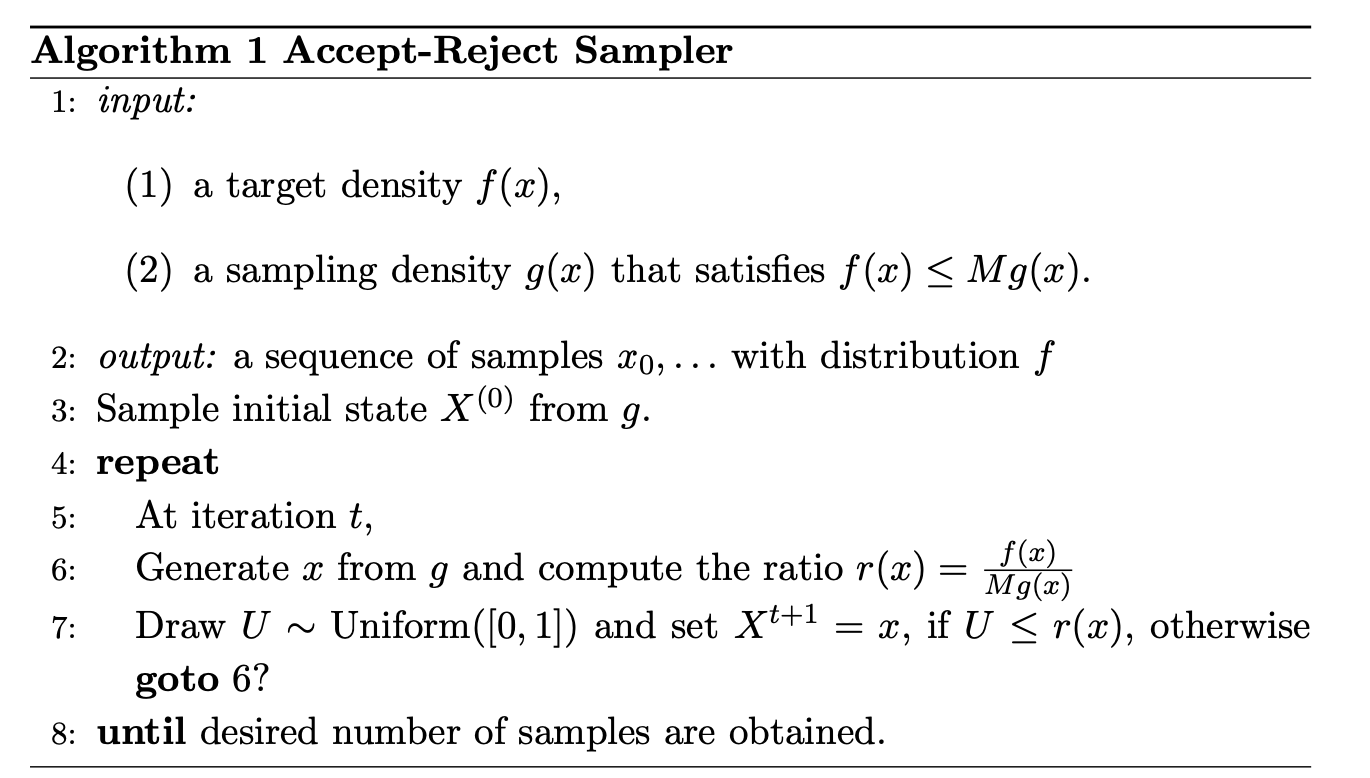

### Eg: Accept- reject sampler代码实现

In [ ]:
import numpy as np

def RN_generator(M, n_samples=1000, type='uni', domain=(0, 1)):
    """
    使用拒绝采样法从给定分布生成样本。

    参数:
    M: 缩放常数，基于最大比值 f(x) / g(x) 选择。
    n_samples: 需要生成的样本数量。
    type: 提议分布类型，'uni' 为均匀分布，'exp' 为指数分布。
    domain: 目标分布的定义域，默认是 [0, 1]。
    
    返回:
    samples: 生成的样本数组。
    """
    
    def target_pdf(x):
        """
        目标概率密度函数 p(x)，可以根据需要进行修改。
        假设目标分布为某种已知的概率密度，定义在 [domain[0], domain[1]] 范围内。
        """
        
        pass
        return XXX

    def proposal_pdf(x):
        """
        提议分布 g(x)，基于选择的 type 参数。
        """
        if type == 'uni':
            # 均匀分布，假设范围是 [0, domain[1]]
            return 1 / (domain[1] - domain[0])  # 在 [0, π] 范围内的均匀分布
        elif type == 'exp':
            # 指数分布，限制在 [0, domain[1]]
            return np.exp(-x) if x >= 0 and x <= domain[1] else 0  # 指数分布 g(x) = exp(-x) for 0 <= x <= π
        else:
            raise ValueError("type 参数必须是 'uni' 或 'exp'")

    # 拒绝采样的参数
    samples = []
    count = 0  # 统计总迭代次数，用于效率检查

    while len(samples) < n_samples:
        # 从提议分布 g(x) 中生成样本
        if type == 'uni':
            x = np.random.uniform(domain[0], domain[1])  # 从均匀分布中采样，限制在 [0, π]
        elif type == 'exp':
            x = np.random.exponential(1)  # 从指数分布中采样
            if x > domain[1]:
                continue  # 如果 x 超过了 π，就跳过，重新生成样本

        # 计算接受的比例 r(x)
        r_x = target_pdf(x) / (M * proposal_pdf(x))
        u = np.random.uniform(0, 1)  # 用于接受的均匀随机数

        # 如果接受该样本，则将其添加到样本中
        if u <= r_x:
            samples.append(x)
        
        count += 1  # 增加迭代次数

    print(f"生成了 {n_samples} 个样本，共进行了 {count} 次迭代。")
    return np.array(samples)


#### 验准

生成了 10000 个样本，共进行了 29986 次迭代。


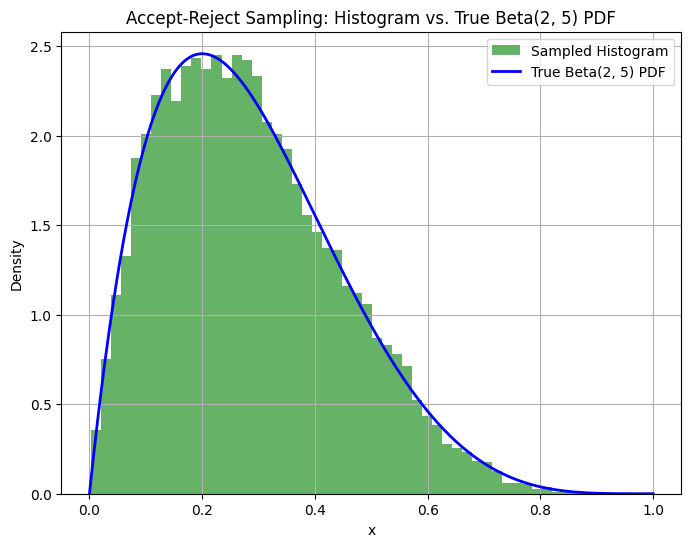

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# 使用 RN_generator 生成样本的函数
def RN_generator(M, n_samples=1000, type='exp', domain=(0, 1)):
    def target_pdf(x):
        """
        目标概率密度函数 p(x)，Beta 分布。
        """
        alpha, beta_param = 2, 5  # 设置 Beta 分布的参数
        return beta.pdf(x, alpha, beta_param)  # 返回 Beta 分布的概率密度

    def proposal_pdf(x):
        """
        提议分布 g(x)，均匀分布在 [0, 1] 范围内。
        """
        return 1 / (domain[1] - domain[0])  # 在 [0, 1] 范围内的均匀分布

    # 拒绝采样的参数
    samples = []
    count = 0  # 统计总迭代次数，用于效率检查

    while len(samples) < n_samples:
        # 从均匀分布中生成样本
        x = np.random.uniform(domain[0], domain[1])
        
        # 计算接受的比例 r(x)
        r_x = target_pdf(x) / (M * proposal_pdf(x))
        u = np.random.uniform(0, 1)  # 用于接受的均匀随机数

        # 如果接受该样本，则将其添加到样本中
        if u <= r_x:
            samples.append(x)
        
        count += 1  # 增加迭代次数

    print(f"生成了 {n_samples} 个样本，共进行了 {count} 次迭代。")
    return np.array(samples)

# 设置 M 的值
M = 3  # 选择一个合适的 M

# 生成 10^4 个样本
n_samples = int(1e4)
samples = RN_generator(M, n_samples=n_samples, type='uni', domain=(0, 1))

# 绘制直方图和真实的 Beta(2, 5) 分布的概率密度曲线
x = np.linspace(0, 1, 1000)
y_true = beta.pdf(x, 2, 5)  # Beta(2, 5) 的真实概率密度

plt.figure(figsize=(8, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Sampled Histogram')
plt.plot(x, y_true, 'b-', label='True Beta(2, 5) PDF', linewidth=2)
plt.title("Accept-Reject Sampling: Histogram vs. True Beta(2, 5) PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


# Part 3 Machine Learning
回归问题一般出现的形式是给出形如f_{Y|X}的条件分布，然后要求我们根据极大似然、交叉熵之类的原则完善损失函数、补充训练过程；
Pattern recognization 问题同理

因此下面仅附上常用的包和代码块（因为不能用大模型），大家伺机而动灵活变通

## Sec 1 常用包

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_abosolute_error
import pandas as pd
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Sec 2 训练集合划分 
常见的坑：打乱 or 不打乱按顺序取；划分点向上取整还是向下; 模型的输入是dataFrame还是Numpy，类型转换...

``` python
# 训练集划分（朴素）
df=pd.read_csv('data/Corona_NLP_train.csv',encoding='latin')
df = df[df['Sentiment'] != 'Neutral']

df.reset_index(drop=True, inplace=True)

df['Y'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)


X = df['OriginalTweet'].values

Y = df['Y'].values

# 常规
from sklearn.model_selection import train_test_split
problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(X,Y, test_size=0.2,random_state=42,shuffle=shuffle)


### 不打乱
#比例[0.6,0,15,0,25]不随机
n = len(X)
train_end = int(0.6 * n)
test_end = int(0.75 * n)-1

# 根据索引划分数据集
X_train = X[:train_end]
Y_train = Y[:train_end]
X_test = X[train_end:test_end]
Y_test= Y[train_end:test_end]
X_valid = X[test_end:]
Y_valid  =Y[test_end:]



### 打乱
n_samples = problem3_X.shape[0]


# 随机打乱数据的索引
indices = np.random.permutation(n_samples)

# 计算划分点
train_end = int(0.4 * n_samples)  # 训练集的结束位置（40%）
calib_end = int(0.6 * n_samples)  # 校准集的结束位置（60%）

# 使用切片根据划分点提取数据
train_indices = indices[:train_end]
calib_indices = indices[train_end:calib_end]
test_indices = indices[calib_end:]

# 划分特征和标签
problem3_X_train = problem3_X[train_indices]
problem3_X_calib = problem3_X[calib_indices]
problem3_X_test = problem3_X[test_indices]

problem3_Y_train = problem3_Y[train_indices]
problem3_Y_calib = problem3_Y[calib_indices]
problem3_Y_test = problem3_Y[test_indices]

print(problem3_X_train.shape,problem3_X_calib.shape,problem3_X_test.shape,problem3_Y_train.shape,problem3_Y_calib.shape,problem3_Y_test.shape)
```

``` python
# df转np
problem1_wind_direction = df['Vindriktning'].to_numpy()
problem1_wind_speed = df['Vindhastighet'].to_numpy()
```


## Sec 3 一个训练类的实例
缺啥补啥

In [ ]:

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    # define the objective/cost/loss function we want to minimise
    def loss(self,X,Y,coeffs):
        
        logits = np.dot(X, coeffs[1:]) + coeffs[0]
        predictions = 1 / (1 + np.exp(-logits))  # 使用 sigmoid 函数得到概率
        # 计算负对数似然损失
        loss_value = -np.mean(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))
        return loss_value

    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        #Use the f above together with an optimization method from scipy
        #to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x)/(1+np.exp(x))
            return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10 # This rounding is to help you with the calibration




## Sec 4 模型评估报告

``` python
# 预测
Y_pred = model.predict(X_test)

# 计算精度（Precision）和召回率（Recall）
precision_0 = precision_score(Y_test, Y_pred, pos_label=0)
precision_1 = precision_score(Y_test, Y_pred, pos_label=1)
recall_0 = recall_score(Y_test, Y_pred, pos_label=0)
recall_1 = recall_score(Y_test, Y_pred, pos_label=1)

# 1. 分类报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 2. 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
```

## Sec 5 画图
这里没用他开学发的文件里的Util.里面的函数,他给的东西真方便啊（真香！）

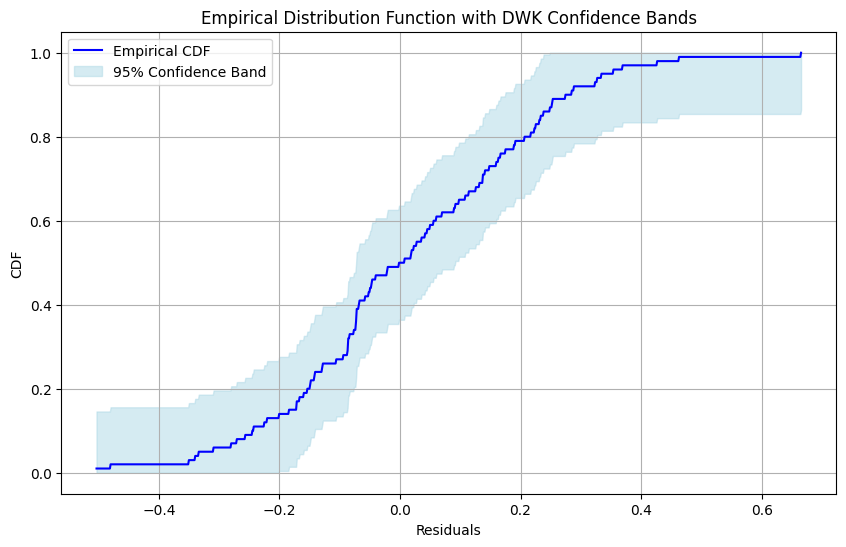

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# 示例数据：真实值和预测值
y_true = np.random.normal(0, 1, 100)
y_pred = y_true + np.random.normal(0, 0.2, 100)

# 1. 计算残差
residuals = y_true - y_pred

# 2. 计算经验分布函数 (EDF)
ecdf = ECDF(residuals)
x = np.linspace(min(residuals), max(residuals), 1000)
y_ecdf = ecdf(x)

# 3. 计算 DWK 置信区间带
n = len(residuals)
epsilon = np.sqrt((1 / (2 * n)) * np.log(2 / 0.05))  # 95% 置信水平
upper_band = np.minimum(y_ecdf + epsilon, 1)
lower_band = np.maximum(y_ecdf - epsilon, 0)

# 4. 绘制残差分布和置信区间
plt.figure(figsize=(10, 6))

# 实证分布函数
plt.plot(x, y_ecdf, label="Empirical CDF", color="blue")

# 置信区间带
plt.fill_between(x, lower_band, upper_band, color="lightblue", alpha=0.5, label="95% Confidence Band")

# 图例和标签
plt.title("Empirical Distribution Function with DWK Confidence Bands")
plt.xlabel("Residuals")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()


## Sec 6 Util 工具类示例

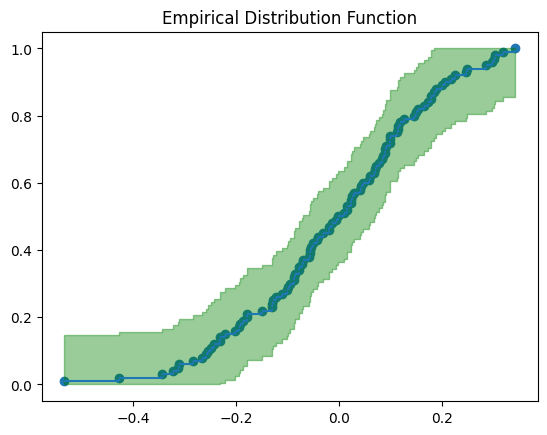

TypeError: cannot unpack non-iterable NoneType object

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from Utils import makeEDF 

# 示例数据：真实值和预测值
y_true = np.random.normal(0, 1, 100)
y_pred = y_true + np.random.normal(0, 0.2, 100)

# 1. 计算残差
residuals = y_true - y_pred

# 2. 使用 utils 绘制实证分布函数 (EDF)
edf_x, edf_y = plotEDF(makeEDF(residuals),force_display=True,points_at_jump=True, confidence_band=True, alpha=0.95)  


## Sec 6 校准
这里提到的校准是用校准器（本质是另一个模型）校准某个模型预测结果的过程。详细的说，校准分为三步。首先把数据集划分成三部分：训练、校准（calib)、测试。
其次，我们先在训练集上训练模型M1，然后用训练好的M1在校准集上预测产生一个结果y_M1_calib_pred，这时候我们有了校准集的实际结果和预测结果y_M1_calib_pred，我们利用这个关系训练模型M2(y_calib,这时候我们有了校准集的实际结果和预测结果y_M1_calib_pred),M2也叫校准器。最后我们在测试集上预测得到y_M1_test_pred,我们用校准器校准它得到最终预测结果。

### 一个例子
来源于Assign3 Problem 3

背景：我们假设已经把数据集分成三部分：*_X_train,*_X_calib,*_X_test
于是我们在训练集训练基准模型，利用其在校准集上的预测的标签真实值训练校准树模型，最后在测试集上利用校准模型修正集准模型的预测结果


``` python
problem3_ps = ProportionalSpam()
problem3_ps.fit(problem3_X_train, problem3_Y_train)


problem3_X_pred = problem3_ps.predict(problem3_X_calib).reshape(-1, 1)

problem3_calibrator = DecisionTreeRegressor()
problem3_calibrator.fit(problem3_X_pred, problem3_Y_calib)

test_pred_raw = problem3_ps.predict(problem3_X_test).reshape(-1, 1)
problem3_final_predictions = problem3_calibrator.predict(test_pred_raw)
```

## Sec 7 Utils 工具文件接口说明

发现老师给的Utils.py文件很好用，因此在这里写个可能有用的接口（？）说明方便查阅
用hoeffding不等式估计的那几个函数挺好用的 :)

+ timeout(seconds=10)
    - 装饰器
    - 在函数前面 @timeout(seconds=10)表示函数最多可以跑10秒
+ basic_stats(data)
    - 给出一些平均值，方差，偏度等基本统计量
    - data: np.aaray,list,df.daraFrame...
+ discrete_histogram(data,normed=False,alpha=1,force_display = True)
    - 画柱状图的
+ plotEMF(numRelFreqPairs, force_display = True)
+ makeEDF(data_sequence)
    - 给EDF数据，数据管道中间函数，结果输出给plotEDF的第一个参数
+ plotEDF(edf, force_display=True, points_at_jump=True, confidence_band=False, alpha=0.95)
    - 绘制经验分布函数（EDF）曲线。
    - 参数说明：
        - **edf**：由 `makeEDF` 提供的经验分布函数。
        - **force_display[True]**：是否强制显示图像（会运行 `plt.show()`）。
        - **points_at_jump[True]**：是否在跳跃点处绘制点。
        - **confidence_band[False]**：是否根据 DK-W 不等式绘制置信带。
        - **alpha[0.95]**：置信带的置信水平。

+ classification_report_interval(y_true, y_pred, labels=None, alpha=0.01, union_bound_correction=True)
    - 生成分类报告，包括精度（precision）、召回率（recall）和准确率（accuracy）。
    - 此外，它使用 Hoeffding 不等式生成每个测量值的置信区间。可以选择是否应用多测量修正（即联合边界修正）。
    - 参数说明：
        - **y_true**：真实标签。
        - **y_pred**：预测标签。
        - **labels[None]**：指定标签。
        - **alpha[0.01]**：置信区间的显著性水平。
        - **union_bound_correction[True]**：是否应用联合边界修正。

+ bennett_epsilon(n, b, sigma, alpha)
    - 根据 Bennett 不等式计算 \( \epsilon \)，满足条件 \( P(|X - E[X]| \geq \epsilon) < \alpha \)。
    - 参数说明：
        - **n**：样本数量。
        - **b**：约束条件 \( |X| \leq b \)。
        - **sigma**：随机变量 \( X \) 的标准差。
        - **alpha**：显著性水平。
    - 返回值：
        - **epsilon**：满足上述条件的 \( \epsilon \)。

+ epsilon_bounded(n, b, alpha)
    - 根据 Hoeffding 不等式计算 \( \epsilon \)，满足条件 \( P(|X - E[X]| \geq \epsilon) < \alpha \)。
    - 参数说明：
        - **n**：样本数量。
        - **b**：约束条件 \( |X| \leq b \)。
        - **alpha**：显著性水平。
    - 返回值：
        - **epsilon**：满足上述条件的 \( \epsilon \)。

+ compute_confidence_interval_bounded(data, delta, min_value=None, max_value=None)
    - 使用 Hoeffding 不等式计算 \( \epsilon \)，满足条件 \( P(X - E[X] > \epsilon) < \delta \)，并基于此构造 \( 1-\delta \) 的置信区间。
    - 置信区间为：\([mean(data)-\epsilon, mean(data)+\epsilon]\)。
    - 参数说明：
        - **data**：数据样本。
        - **delta**：置信水平。
        - **min_value[None]**：如果存在下限，将 \( point\_estimate-\epsilon \) 替换为 \( max(point\_estimate-\epsilon, min_value) \)。
        - **max_value[None]**：如果存在上限，将 \( point\_estimate+\epsilon \) 替换为 \( min(point\_estimate+\epsilon, max_value) \)。
    - 返回值：
        - **point_estimate[np.array]**：区间的中心点。


# 一些奇怪bug
to be continued....